# A Primer on Python for Statistical Programming and Data Science

### Chris Fonnesbeck
Senior Quantitative Analyst, The New York Yankees

---

![python](http://imgs.xkcd.com/comics/python.png)

(via [xkcd](http://imgs.xkcd.com/comics/python.png))

## What is Python?

Python is a modern, open source, object-oriented programming language, created by a Dutch programmer, Guido van Rossum. Officially, it is an **interpreted** scripting language (meaning that it is not compiled until it is run) for the C programming language; in fact, Python itself is coded in C (though there are other non-C implementations). Frequently, it is compared to languages like Perl and Ruby. It offers the power and flexibility of lower level (*i.e.* compiled) languages, without the steep learning curve, and without most of the associated programming overhead. The language is very clean and readable, and it is available for almost every modern computing platform.


## Why use Python for scientific programming?

Python offers a number of advantages to scientists, both for experienced and novice programmers alike:


### Free and open 

Python is released on all platforms under an open license (Python Software Foundation License), meaning that the language and its source is freely distributable. Not only does this keep costs down for scientists and universities operating  under a limited budget, but it also frees programmers from licensing concerns for any software they may develop. There is little reason to buy expensive licenses for software such as Matlab or Maple, when Python can provide the same functionality for free!


### Powerful and easy to use

Python is simultaneously powerful, flexible and easy to learn and use (in general, these qualities are traded off for a given programming language). Anything that can be coded in C, FORTRAN, or Java can be done in Python, almost always in fewer lines of code, and with fewer debugging headaches. Its standard library is extremely rich, including modules for string manipulation, regular expressions, file compression, mathematics, profiling and debugging (to name only a few). Unnecessary language constructs, such as `END` statements and brackets are absent, making the code terse, efficient, and easy to read. Finally, Python is object-oriented, which is an important programming paradigm particularly well-suited to scientific programming, which allows data structures to be abstracted in a natural way.

> Python is a language that is very powerful for developers, but is also accessible to Astronomers
-- Perry Greenfield

Dynamic typing:

In [1]:
my_variable = 42
print(my_variable)

42


In [2]:
my_variable = 'Welcome to ENAR'
print(my_variable)

Welcome to ENAR


Python's syntax is clean and easy to read, often described as **runnable pseudocode**.

#### Example: Numerical Integration

As an example, consider a Python implementation of the **trapezoidal rule**, a method from numerical analysis for approximating a definite integral. Specifically, it allows us to approximate:

$$\int_a^b f(x) dx$$

using the approximation:

$$\int_a^b f(x) dx \approx h \left[ \sum_{i=0}^n f(a + ih)\right]\frac{f(b) + f(a)}{2}$$

Here is a Python function that implements this approximation. Notice a few things:

- no brackets, only whitespace
- commenting with # symbols
- functions can be passed as arguments to other functions
- `for` loop can be expressed in a single line, using a **comprehension**

In [3]:
def trapezoidal(func, from_a, to_b, n_intervals):
    
    # Calculate the width of each chunk
    int_width = (to_b - from_a) / n_intervals
    
    # Loop using a comprehension
    sum_y = sum(func(from_a + i*int_width) for i in range(n_intervals))
     
    sum_y += 0.5 * (func(from_a) + func(to_b))
    
    return sum_y * int_width

Now we can use the `trapezoidal` function to approximate a polynomial function, for example:

In [4]:
def some_polynomial_function(x):
    return 2 * x**2 + 3 * x + 1

In [5]:
trapezoidal(some_polynomial_function, 1, 5, 1000)

122.69068800000001

### Interactive

Python may be run interactively on the command line, in much the same way as Octave or R. Rather than compiling and running a particular program, commands may entered serially followed by the `Return` key. This is often useful for mathematical programming and debugging.

### Extensible

Python is often referred to as a “glue” language, meaning that it is a useful in a mixed-language environment. Frequently, programmers must interact with colleagues that operate in other programming languages, or use significant quantities of legacy code that would be problematic or expensive to re-code. Python was designed to interact with other programming languages, and in many cases C or FORTRAN code can be compiled directly into Python programs (using packages such as `f2py` or `cython`). Additionally, since Python is an interpreted language, it can sometimes be slow relative to its compiled cousins. In many cases this performance deficit is due to a short loop of code that runs thousands or millions of times. Such bottlenecks may be removed by coding a function in FORTRAN, C or Cython, and compiling it into a Python module.

For example, let's time our `trapezoidal` function to see how fast it runs:

In [6]:
%timeit trapezoidal(some_polynomial_function, 1, 5, 1000)

346 µs ± 23.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


If this function happened to be the bottleneck in our code, we could replace it with faster code using a different language, and call it from Python.

Let's look at an implementation in Cython, which is a Python-like language that allows Python programmers to write fast code without having to write C/C++/Fortran directly. It looks much like Python code, but with type declarations. Cython code is translated it to C (or C++ or others), which is then compiled to create a Python extension that we can import and use.

In [7]:
%load_ext cython

In [8]:
%%cython

cdef inline double fast_polynomial(double x):
    return 2*x*x + 3*x + 1

cpdef trapezodial_fast(double a, double b, int n):
    cdef double h, x, sumy
    cdef int i
    h = (b-a)/n 
    sumy = 0
    x=a
    for i in range(n):
        x += h
        sumy += fast_polynomial(x)
    sumy += 0.5*(fast_polynomial(a) + fast_polynomial(b))
    return sumy*h

Verify that it does the same thing:

In [9]:
trapezodial_fast(1, 5, 10000)

122.6930668799846

Using Cython, we can achieve speedups of several orders of magnitude, often faster than hand-coded C code. In addtion, Cython is compatible with core scientific programming tools like NumPy and IPython.

Cython has built-in support for multicore processing.

Cython is used to varying degrees by other packages in the Python scientific stack, such as pandas, sympy, scikit-learn and SciPy.

In [10]:
%timeit trapezodial_fast(1, 5, 1000)

1.81 µs ± 57.3 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


The extensibility of Python makes it useful as a **glue language**, in mixed-language environments.

### Third-party modules

There is a vast body of Python modules created outside the auspices of the Python Software Foundation. These include utilities for database connectivity, mathematics, statistics, and charting/plotting. Some notables include:

* ***NumPy***: Numerical Python (NumPy) is a set of extensions that provides the ability to specify and manipulate array data structures. It provides array manipulation and computational capabilities similar to those found in Matlab or Octave. 
* ***SciPy***: An open source library of scientific tools for Python, SciPy supplements the NumPy module. SciPy gathering a variety of high level science and engineering modules together as a single package. SciPy includes modules for graphics and plotting, optimization, integration, special functions, signal and image processing, genetic algorithms, ODE solvers, and others.
* ***Matplotlib***: Matplotlib is a python 2D plotting library which produces publication-quality figures in a variety of hardcopy formats and interactive environments across platforms. Its syntax is very similar to Matlab. 
* ***Pandas***: A module that provides high-performance, easy-to-use data structures and data analysis tools. In particular, the `DataFrame` class is useful for spreadsheet-like representation and mannipulation of data. Also includes high-level plotting functionality.
* ***IPython***: An enhanced Python shell, designed to increase the efficiency and usability of coding, testing and debugging Python. It includes both a Qt-based console and an interactive HTML notebook interface, both of which feature multiline editing, interactive plotting and syntax highlighting.

![](images/ecosystem.png)
(courtesy Jake Vanderplas)

In [11]:
import sympy

xs = sympy.symbols('xs')

polynomial = 2*xs*xs + 3*xs + 1

In [12]:
print(polynomial)

2*xs**2 + 3*xs + 1


In [13]:
integrated_polynomial = sympy.integrate(polynomial, (xs, 1, 5))
integrated_polynomial.evalf()

122.666666666667

## Idiomatic Python

Effective Python programming involves applying particular Python **idioms** effectively; these are idiosyncratic expressions that may only exist in Python (if you are coming from another language), but when used appropriately they can make your code more readable, faster, or both. You have seen some of these already -- for example, the **comprehension** as a means for succinctly implementing a `for` loop.

### Comprehensions

In [14]:
import numpy as np

def do_math(x):
    return 3 + x**3

In [15]:
%%timeit
squares = np.empty(1000000)
for i in range(1000000):
    squares[i] = do_math(i)

501 ms ± 13.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [16]:
%timeit squares = [do_math(i) for i in range(1000000)]

421 ms ± 9.03 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Here, not only is the list comprehension easier to write and read, it is also slightly faster.

### Generators

When you are dealing with a large number of elements that you do not need all at once, you can also consider another Python expression: the **generator**. For example, if we enclose the comprehension in parentheses instead of square brackets, we get a **generator expression** object:

In [17]:
(i**2 for i in range(int(1e20)))

<generator object <genexpr> at 0x11115ffc0>

Now, rather than storing 100,000,000,000,000,000,000,000 elements in memory, we can produce values as needed:

In [18]:
squares = (i**2 for i in range(int(1e10)))
next(squares)

0

In [19]:
next(squares)

1

### Built-in functions

Before you go about coding your own functions, make sure that it isn't already provided as a **built-in function**. These are typically highly optimized, and written in C! [Here is a list of built-in functions](https://docs.python.org/3/library/functions.html).

### String concatenation

Just as you should avoid growing lists or arrays by concatenation or appending, iterating over strings and concatenating them manually is very inefficient. For example, let's say we want to concatente a list of strings into a single string:

In [20]:
words = ["Six",
"days",
"in",
"to",
"what",
"should",
"be",
"a",
"greatest",
"two",
"months",
"of",
"my",
"life",
"and",
"it’s",
"turned",
"in",
"to",
"a",
"nightmare"]

One might be tempted to code the following:

In [21]:
sentence = ""
for word in words:
    sentence += " " + word
sentence

' Six days in to what should be a greatest two months of my life and it’s turned in to a nightmare'

However, this is inefficient; since strings is immutable in Python, every `+` operation involves creating a new string and copying the old content. Instead, we can use the string method `join`, which is not only faster, but more flexible. Here, we would like to separate the words by spaces, which is easily done:

In [22]:
' '.join(words)

'Six days in to what should be a greatest two months of my life and it’s turned in to a nightmare'

### Avoid loops

As we have seen, `for` loops in Python are slow. Wherever possible, avoid looping by using alternative strategies or vectorized operations. For example, say we wanted to return the common elements between two arrays. We might naively loop over both lists, comparing them elementwise to return their intersection:

In [23]:
np.random.seed(1)
list1 = np.random.choice(np.arange(20), replace=False, size=10)
list2 = np.random.choice(np.arange(20), replace=False, size=10)

def common_elements(a, b):
    for i in a:
        for j in b:
            if i==j:
                yield i

In [24]:
%timeit list(common_elements(list1, list2))

14 µs ± 174 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


However, this involves two Python `for` loops and a conditional statement. Instead, we can use set operations on the built-in `set` type provided by Python:

In [25]:
%timeit set(list1) & set(list2)

2.69 µs ± 151 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


###  Use NumPy

Often, considerable performance gains can be achieved by replacing Python data structures and functions with corresponding NumPy versions. It provides a high-performance multidimensional array object, and tools for working with these arrays. 

This example, borrowed from NumPy creator Travis Oliphant, solves Laplace's equation over a 2-d rectangular grid using a simple iterative method. The code finds a two-dimensional function, u, where ∇2 u = 0, given some fixed boundary conditions.

In [26]:
dx = 0.1
dy = 0.1
dx2 = dx*dx
dy2 = dy*dy

def py_update(u):
    nx, ny = u.shape
    for i in range(1,nx-1):
        for j in range(1, ny-1):
            u[i,j] = ((u[i+1, j] + u[i-1, j]) * dy2 +
                      (u[i, j+1] + u[i, j-1]) * dx2) / (2*(dx2+dy2))

In [27]:
def calc(N, Niter=100, func=py_update, args=()):
    u = np.zeros([N, N])
    u[0] = 1
    for i in range(Niter):
        func(u,*args)
    return u

This code takes a very long time to run in order to converge to the correct solution. For a 100x100 grid, visually-indistinguishable convergence occurs after about 8000 iterations.

In [28]:
%timeit calc(10)

9.47 ms ± 1.41 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


Using NumPy, we can speed this code up significantly by using slicing and vectorized (automatic looping) calculations that replace the explicit loops in the Python-only solution. 

In [29]:
def num_update(u):
    u[1:-1,1:-1] = ((u[2:,1:-1]+u[:-2,1:-1])*dy2 + 
                    (u[1:-1,2:] + u[1:-1,:-2])*dx2) / (2*(dx2+dy2))

In [30]:
%timeit calc(10, func=num_update)

877 µs ± 135 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Such speed-ups are not uncommon when using NumPy to replace Python loops where the inner loop is doing simple math on basic data-types.

# Example: Survival Analysis

To give you a feel for what using Python for data analysis is like, let's dive right in and look at a real-world example. This is a survival analysis of mastectomy data, based on an example by Austing Rochford of the PyMC3 team.

## Loading libraries

We use the **import** statement to load non-core modules into our Python environment. Packages with long names can be **aliased** to shorter names.

In [31]:
import numpy as np
import pandas as pd
import pymc3 as pm
from matplotlib import pyplot as plt
import seaborn as sns

Pandas offers functions for automating the import of common data formats, such as comma-separated values (csv). Once imported, the data are stored in a tabular `DataFrame` object.

In [32]:
df = pd.read_csv('../data/mastectomy.csv')
df.head()

,time,event,metastized
0,23,True,no
1,47,True,no
2,69,True,no
3,70,False,no
4,100,False,no


Pandas offers functions and methods for cleaning and processing the data; for example, we want to recode all of our variables as numeric types.

In [33]:
df.event = df.event.astype(int)
df.metastized = (df.metastized == 'yes').astype(int)
n_patients = df.shape[0]

In [34]:
df.head()

,time,event,metastized
0,23,1,0
1,47,1,0
2,69,1,0
3,70,0,0
4,100,0,0


In addition, we can summarize our data.

In [35]:
df.event.mean()

0.5909090909090909

## Plotting Data

The mathematician Richard Hamming once said,

> The purpose of computing is insight, not numbers

and the best way to develop insight is often to visualize data. Visualization deserves an entire lecture (or course) of its own, but we can explore a few features of Python's `matplotlib` library here. 

While there is no "official" plotting library, this package is the *de facto* standard.

> ## Some IPython magic
>
> If you're using an IPython / Jupyter notebook,
> you'll need to execute the following command
> in order for your matplotlib images to appear
> in the notebook:
>
> ```
> % matplotlib inline
> ```
>  
> The `%` indicates an IPython **magic function** -
> a function that is only valid within the notebook environment.
> Note that you only have to execute this function once per notebook.


In [36]:
%matplotlib inline

The following function plots the survival data, showing both the groups (metastized or not) and the events (or censoring).

The `subplots` function creates a set of axes and a figure into which it is embedded. The function proceeds by drawing lines (`hlines`) and points (`scatter`) onto the axes, then adding labels and customizing the axes to best display survival information.

In [37]:
def plot_group_events(df, group_col, xlabel='', figsize=(8, 6)):
    
    fig, ax = plt.subplots(figsize=figsize)

    blue, _, green = sns.color_palette()[:3]
    
    patients = df.index.values

    ax.hlines(patients[df[group_col].values == 1], 0, df[df[group_col].values == 1].time,
              color=blue, label=group_col)

    ax.hlines(patients[df[group_col].values == 0], 0, df[df[group_col].values == 0].time,
              color=green, label='not ' + group_col)

    ax.scatter(df[df.event.values == 1].time, patients[df.event.values == 1],
               color='k', zorder=10, label='event')

    ax.set_xlim(left=0)
    ax.set_xlabel(xlabel)
    ax.set_yticks([])
    ax.set_ylabel('Subject')

    ax.set_ylim(-0.25, n_patients + 0.25)

    ax.legend(loc='center right')
    
    return fig, ax

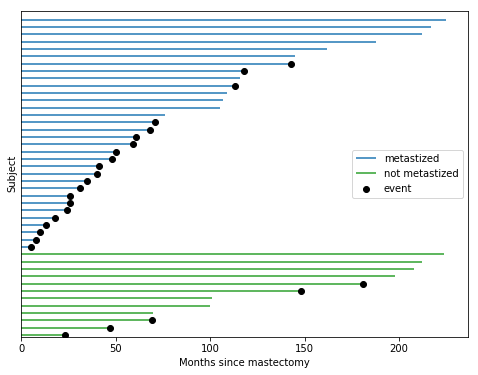

In [38]:
plot_group_events(df, 'metastized', 'Months since mastectomy');

#### Bayesian proportional hazards model

The two most basic estimators in survial analysis are the [Kaplan-Meier estimator](https://en.wikipedia.org/wiki/Kaplan%E2%80%93Meier_estimator) of the survival function and the [Nelson-Aalen estimator](https://en.wikipedia.org/wiki/Nelson%E2%80%93Aalen_estimator) of the cumulative hazard function.  However, since we want to understand the impact of metastization on survival time, a risk regression model is more appropriate.  Perhaps the most commonly used risk regression model is [Cox's proportional hazards model](https://en.wikipedia.org/wiki/Proportional_hazards_model).  In this model, if we have covariates $\mathbf{x}$ and regression coefficients $\beta$, the hazard rate is modeled as

$$\lambda(t) = \lambda_0(t) \exp(\mathbf{x} \beta).$$

Here $\lambda_0(t)$ is the baseline hazard, which is independent of the covariates $\mathbf{x}$.  In this example, the covariates are the one-dimensonal vector `df.metastized`.
    
In order to perform Bayesian inference with the Cox model, we reparameterize it using a method called the **Poisson trick**, which changes the analysis from using time-to-event data to using count data. This requires us to partition the time range in question into intervals with endpoints $0 \leq s_1 < s_2 < \cdots < s_N$. With this partition, $\lambda_0 (t) = \lambda_j$ if $s_j \leq t < s_{j + 1}$.  With $\lambda_0(t)$ constrained to have this form, all we need to do is choose priors for the $N - 1$ values $\lambda_j$.  We use independent vague priors $\lambda_j \sim \operatorname{HalfCauchy}(1).$  For our mastectomy example, we make each interval three months long.

We also must specify priors on $\beta$ and $\lambda_0(t)$.  We place a normal prior on $\beta$, $\beta \sim N(\mu_{\beta}, \sigma_{\beta}^2),$ where $\mu_{\beta} \sim N(0, 10^2)$ and $\sigma_{\beta} \sim U(0, 10)$. The likelihood for the count data is a Poisson sampling distribution.

We can use `NumPy`'s functions to help us restructure our data to use the Poisson model. First, we can create a set of discrete time intervals of 3 months in length, using the `arange` function:

In [39]:
interval_length = 3
interval_bounds = np.arange(0, df.time.max() + interval_length + 1, interval_length)
n_intervals = interval_bounds.size - 1
intervals = np.arange(n_intervals)

Then, our event data becomes a grid of patients and intervals, with a one in cells that a death occurs, and zero otherwise.

In [40]:
last_period = np.floor((df.time - 0.01) / interval_length).astype(int)

patients = df.index.values

death = np.zeros((n_patients, n_intervals))
death[patients, last_period] = df.event

metastized = df.metastized.values

In [41]:
death

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

To account for censoring and discretization, we also create an exposure variable that contains the number of months (0-3) in each interval that the patient was exposed to the risk of death.

In [42]:
exposure = np.greater_equal.outer(df.time, interval_bounds[:-1]) * interval_length
exposure[patients, last_period] = df.time - interval_bounds[last_period]

In [43]:
exposure

array([[3, 3, 3, ..., 0, 0, 0],
       [3, 3, 3, ..., 0, 0, 0],
       [3, 3, 3, ..., 0, 0, 0],
       ...,
       [3, 3, 3, ..., 0, 0, 0],
       [3, 3, 3, ..., 0, 0, 0],
       [3, 3, 3, ..., 3, 3, 3]])

We fit the model using PyMC3, which allows us to specify the model and use Markov chain Monte Carlo (MCMC) to estimate it.

In [44]:
outer = pm.math.tt.outer

with pm.Model() as model:

    λ_0 = pm.HalfCauchy('λ_0', 1, shape=n_intervals)

    α = pm.Normal('α', 0, sd=5)
    β = pm.Normal('β', 0, sd=5)

    λ = outer(pm.math.exp(α + β * metastized), λ_0)
    μ = exposure * λ

    obs = pm.Poisson('obs', μ, observed=death)

In [45]:
with model:
    
    trace = pm.sample(1000, tune=2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [β, α, λ_0]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:18<00:00, 329.94draws/s]


PyMC3 includes a suite of functions for summarizing output, both in graphical and tabular forms. 

In [46]:
pm.summary(trace, ['β']).round(2)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
β,0.93,0.48,0.01,0.01,1.86,3212.49,1.0


/Users/fonnescj/Repos/pymc3/pymc3/plots/__init__.py:40: UserWarning: Keyword argument `varnames` renamed to `var_names`, and will be removed in pymc3 3.8
  warnings.warn('Keyword argument `{old}` renamed to `{new}`, and will be removed in pymc3 3.8'.format(old=old, new=new))


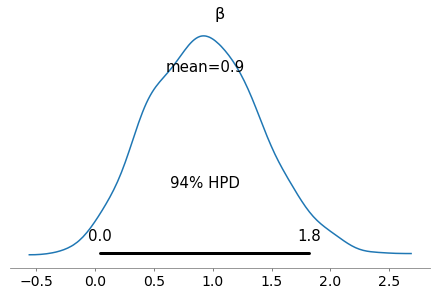

In [47]:
pm.plot_posterior(trace, varnames=['β'], color='#87ceeb');

## Getting Python

How do you obtain and configure Python?

Python comes pre-installed on some systems, but I recommend using the [Anaconda](https://www.anaconda.com) distribution because it includes enhancements that make configuring and maintaining Python on your computer much easier. Anaconda is freely available from the [Anaconda download page](https://www.anaconda.com/distribution/#download-section).

![](images/anaconda.png)

Download the Python 3.7 installer for your system, and execute the file, following the on-screen instructions.

### System requirements

- Operating system: Windows 7 or newer, 64-bit macOS 10.10+, or Linux, including Ubuntu, RedHat, CentOS 6+, and others.
- If your operating system is older than what is currently supported, you can find older versions of the Anaconda installers in our archive that might work for you.
- System architecture: Windows- 64-bit x86, 32-bit x86; MacOS- 64-bit x86; Linux- 64-bit x86, 64-bit Power8/Power9.
- Minimum 5 GB disk space to download and install.

On Windows, macOS, and Linux, it is best to install Anaconda for the local user, which does not require administrator permissions and is the most robust type of installation. 

During the installation, you will be asked if Anaconda should modify the PATH variable on your machine. It is recommended that you allow this, as it permits Anaconda to become the default Python installation on your machine, incase there are other versions already on your system.

Once installed, you can run Python from either the native terminal (macOS or Linux) or the Anaconda Prompt (Windows).

![](images/anaconda_python.png)

### conda

One of the great advantages to using the Anaconda Python distribution is the `conda` utility that is bundled with it. Conda is a powerful package manager and environment manager that you use with command line commands at the Anaconda Prompt for Windows, or in a terminal window for macOS or Linux.

For example, we can use it to install third-party packages via `conda install`:

![](images/conda_install.png)

Or it can be used to update packages that are already installed:

![](images/conda_update.png)

And if you are unsure about whether a package is available in the Conda repository, you can search for it:

![](images/conda_search.png)

### conda environments

Conda allows you to create separate environments containing files, packages and their dependencies that will not interact with other environments.

![Python environments](https://imgs.xkcd.com/comics/python_environment.png)

When you begin using conda, you already have a default environment named base. You don't want to put programs into your base environment, though. Create separate environments to keep your programs isolated from each other.

For example, we can create a new environment and install a package in it:

![](images/conda_create.png)

Conda will determine the dependencies of any package that you specify for installation, and install them as well. 

![](images/conda_env.png)
(via [xkcd](https://xkcd.com/1987/))

Once created, Conda tells you how to activate the environment, via `conda activate`.

![](images/conda_activate.png)

The repository for this tutorial contains a file called `environment.yml` that includes a list of all the packages used for the tutorial. If you run

    conda env create
    
in the directory containing `environment.yml` it will create the environment for you and install all of the packages listed.

---

## To Learn More

[Software Carpentry](http://software-carpentry.org/lessons.html) is a great place to learn Python if you are not already a programmer. Here are some additional resources:

- Bassi S (2007) [A Primer on Python for Life Science Researchers](http://www.ploscompbiol.org/article/info%3Adoi%2F10.1371%2Fjournal.pcbi.0030199). PLoS Comput Biol 3(11): e199
- [Scipy Lecture Notes](https://scipy-lectures.org/)
- [Python Data Science Handbook](https://www.amazon.com/Python-Data-Science-Handbook-Essential/dp/1491912057), by Jake Vanderplas
- [Data Science with Python](https://www.datacamp.com/tracks/data-scientist-with-python) from DataCamp